# Approach of the problem

1. Approach of the proble
2. Import necessary libraries and data
3. Data preprocessing and transformation
4. Visulaization
5. Analysis
    * univariate
    * bi variate
    * multivariate
6. supervised
    * classification ( y is continious)
    * Regression (y is discrete)
7. Unsupervised


# Import necessary libraries and data

In [374]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from scipy.stats import chi2_contingency
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [375]:
data= pd.read_csv('/content/bank.csv',sep=';')

# Data preprocessing and transformation

In [376]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [377]:
data.shape

(36959, 21)

In [378]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,36959.000000,36959.000000,36959.000000,36959.000000,36959.000000,36959.000000,36959.000000,36959.000000,36959.000000,36959.000000
mean,39.653562,254.813929,2.650207,989.697881,0.099732,0.362669,93.617336,-41.129625,3.943194,5184.267139
std,9.452245,260.052563,2.879095,95.690790,0.317363,1.378397,0.517770,3.981914,1.530319,52.667798
min,18.000000,0.000000,1.000000,0.000000,0.000000,-2.900000,92.469000,-50.000000,1.072000,5076.200000
25%,32.000000,99.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.811000,5099.100000
50%,38.000000,175.000000,2.000000,999.000000,0.000000,1.100000,93.918000,-42.000000,4.858000,5195.800000
75%,47.000000,314.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,95.000000,4918.000000,56.000000,999.000000,4.000000,1.400000,94.465000,-33.600000,5.045000,5228.100000


In [379]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36959 entries, 0 to 36958
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             36959 non-null  int64  
 1   job             36959 non-null  object 
 2   marital         36959 non-null  object 
 3   education       36959 non-null  object 
 4   default         36959 non-null  object 
 5   housing         36959 non-null  object 
 6   loan            36959 non-null  object 
 7   contact         36959 non-null  object 
 8   month           36959 non-null  object 
 9   day_of_week     36959 non-null  object 
 10  duration        36959 non-null  int64  
 11  campaign        36959 non-null  int64  
 12  pdays           36959 non-null  int64  
 13  previous        36959 non-null  int64  
 14  poutcome        36959 non-null  object 
 15  emp.var.rate    36959 non-null  float64
 16  cons.price.idx  36959 non-null  float64
 17  cons.conf.idx   36959 non-null 

*  It does  not contains any null values

# Visualization

plotting distplot for numerical values to see the distribution

In [380]:
numerical_values= data.select_dtypes(include=[np.number])

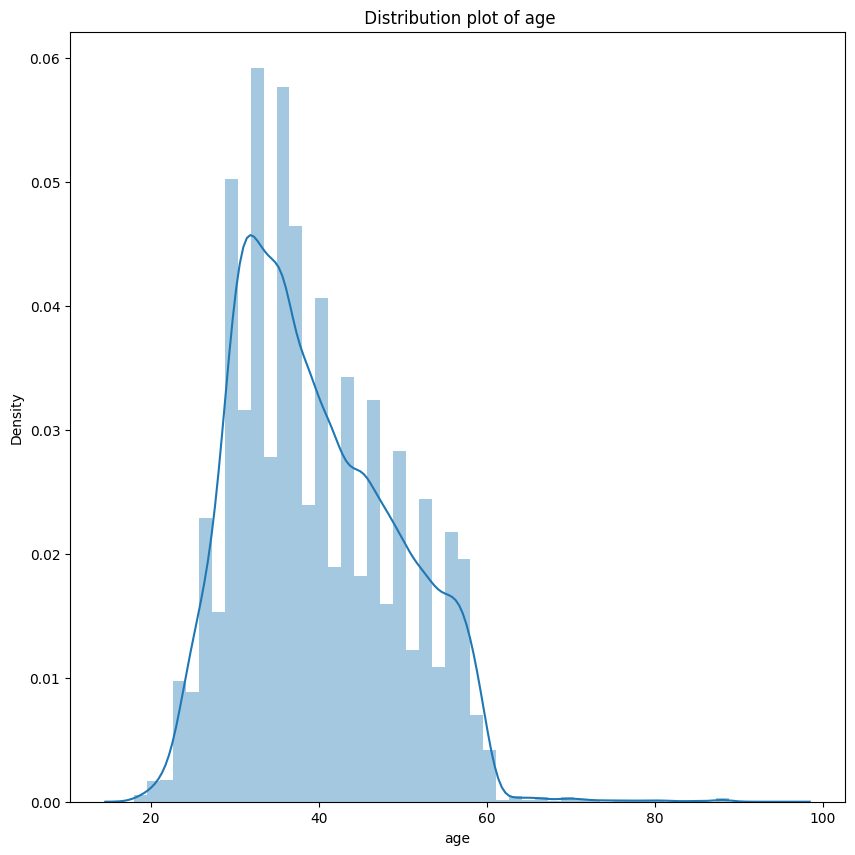

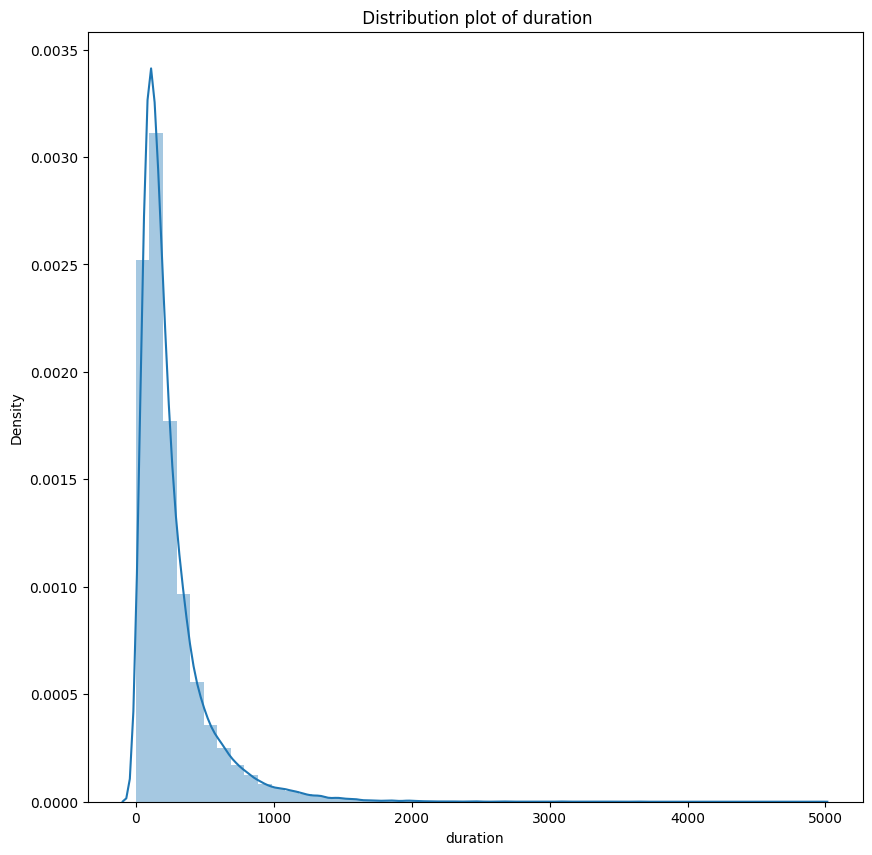

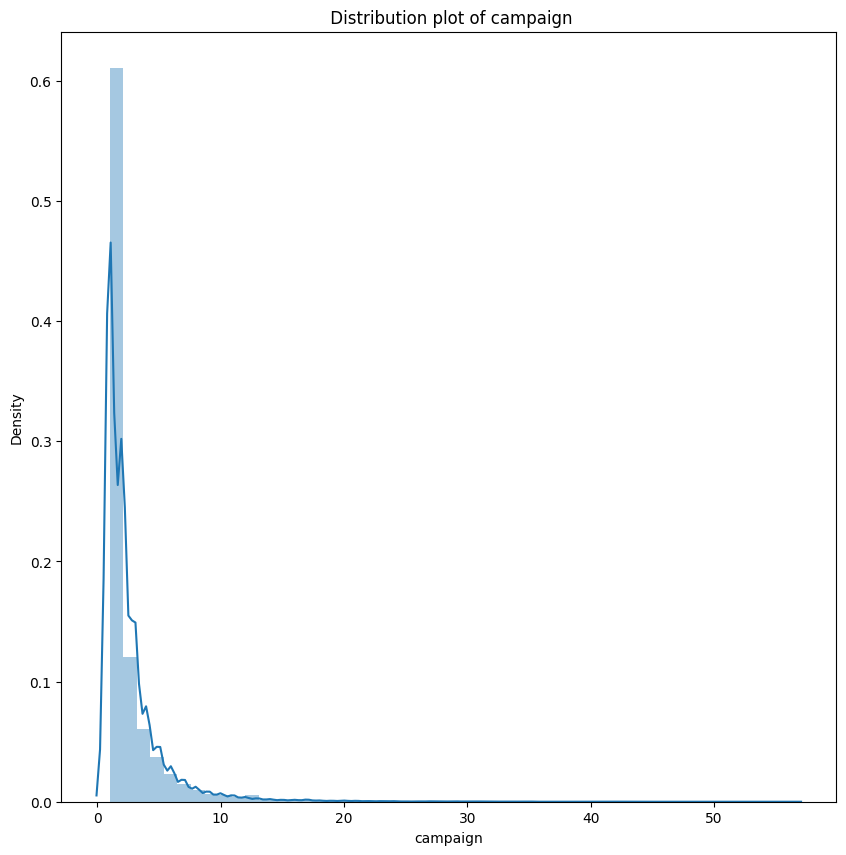

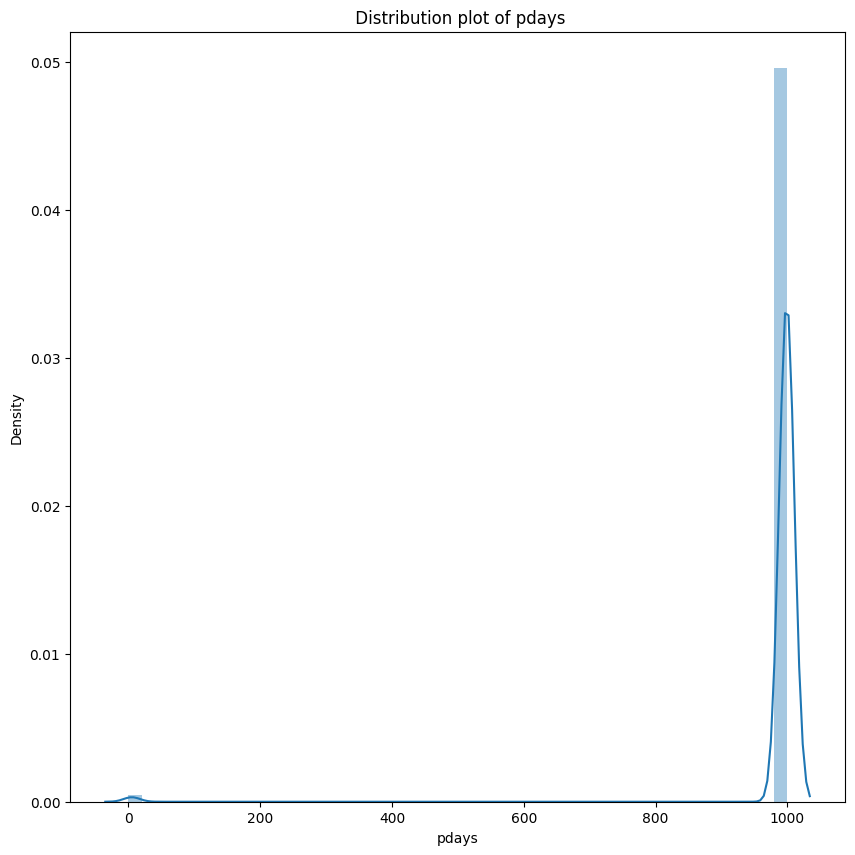

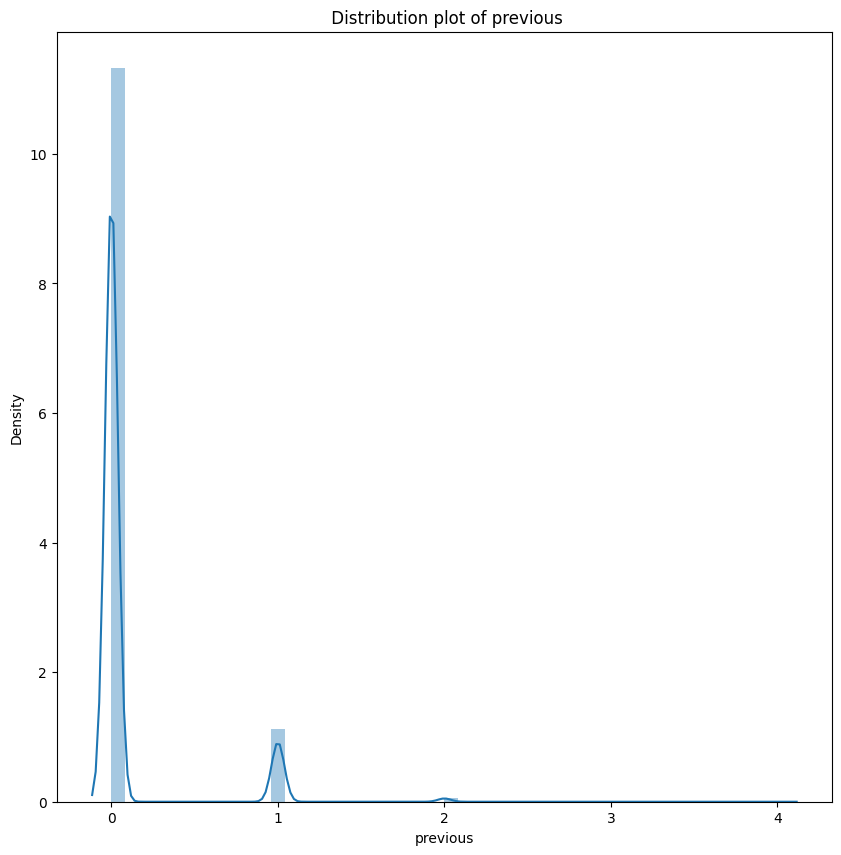

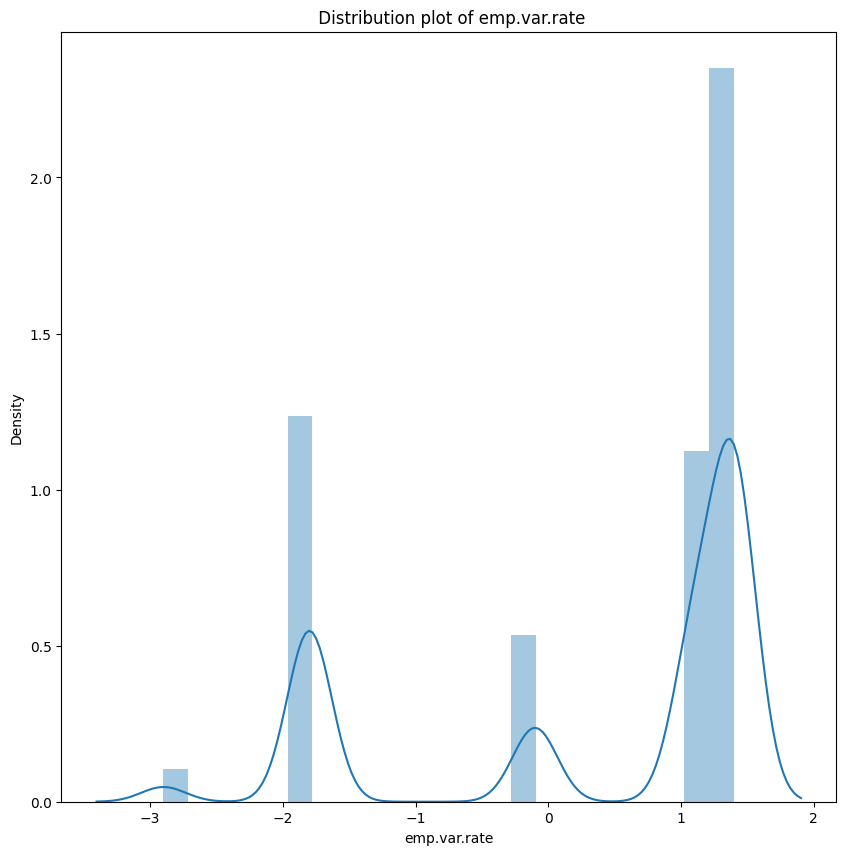

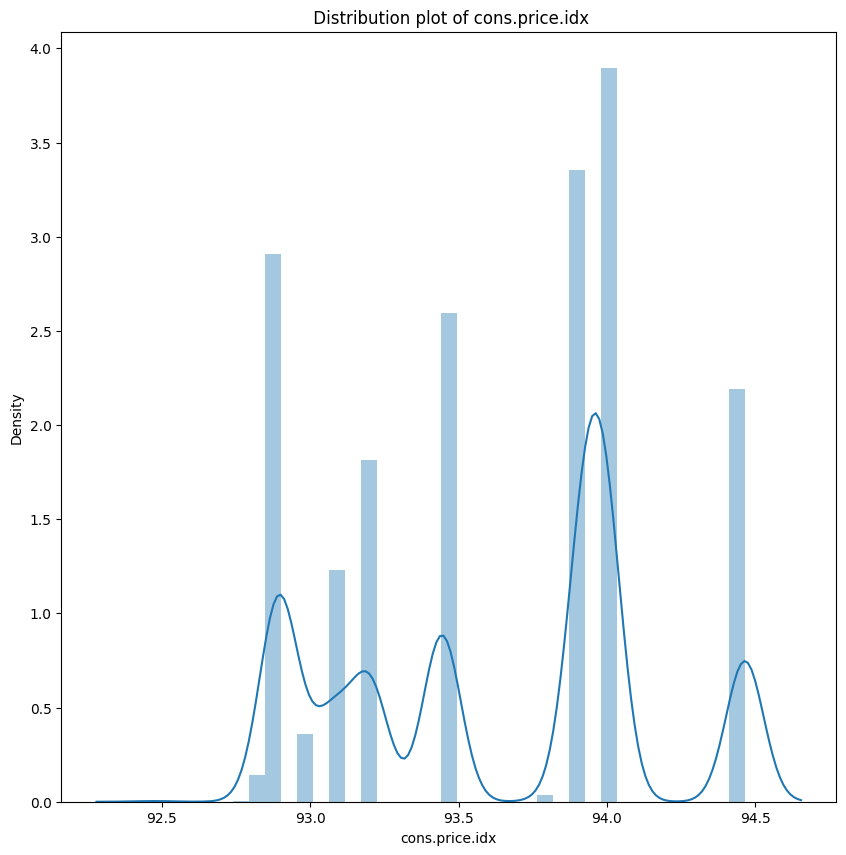

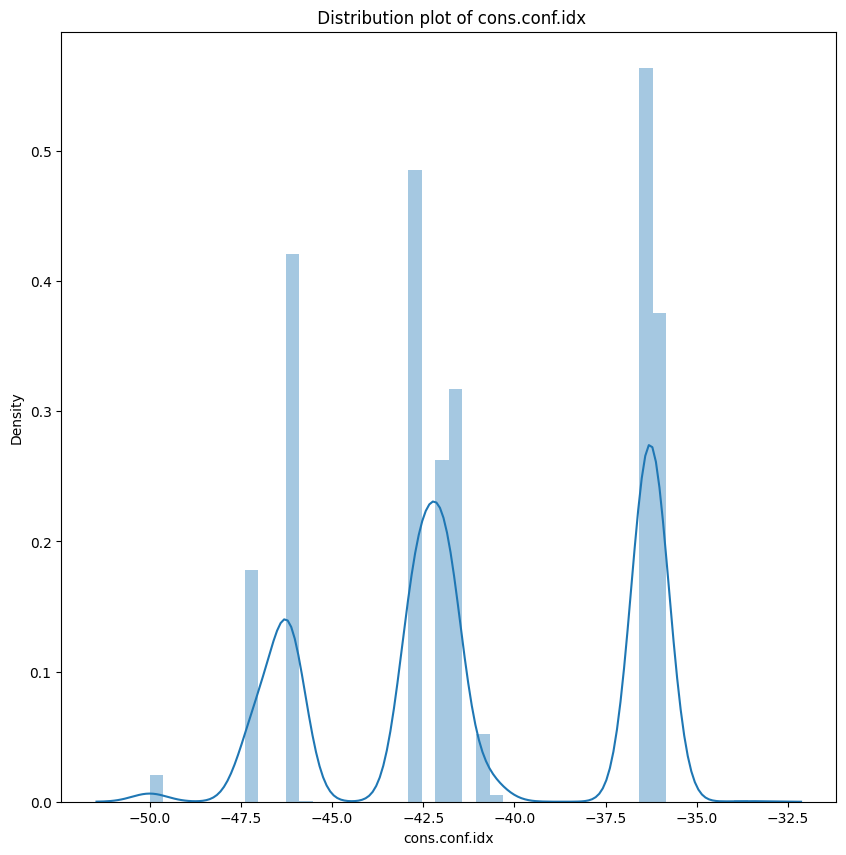

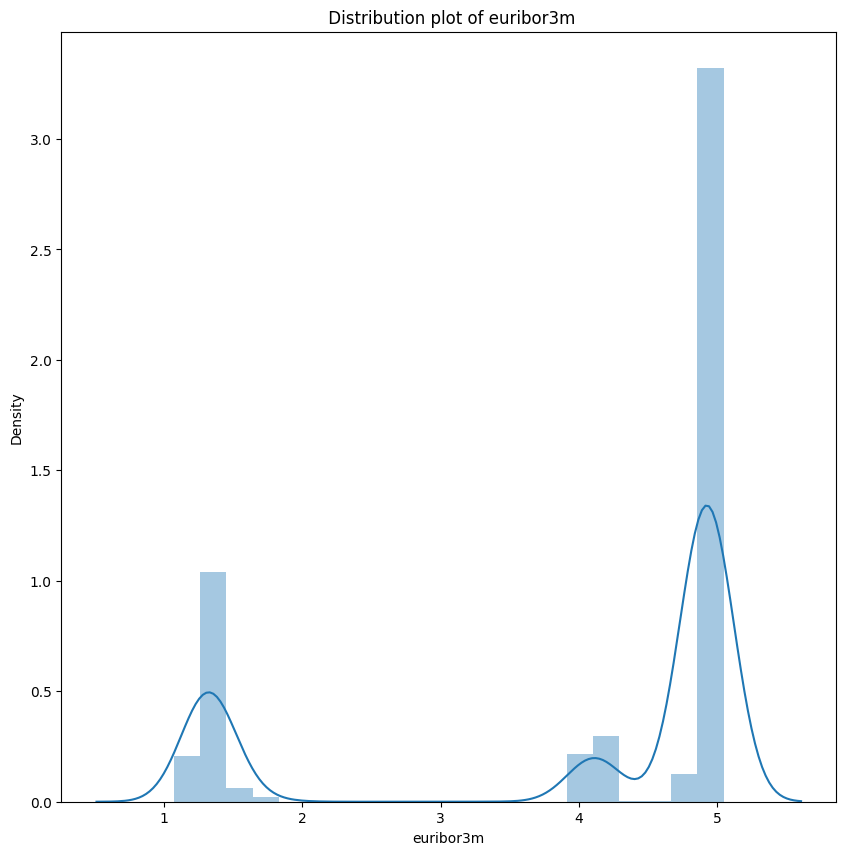

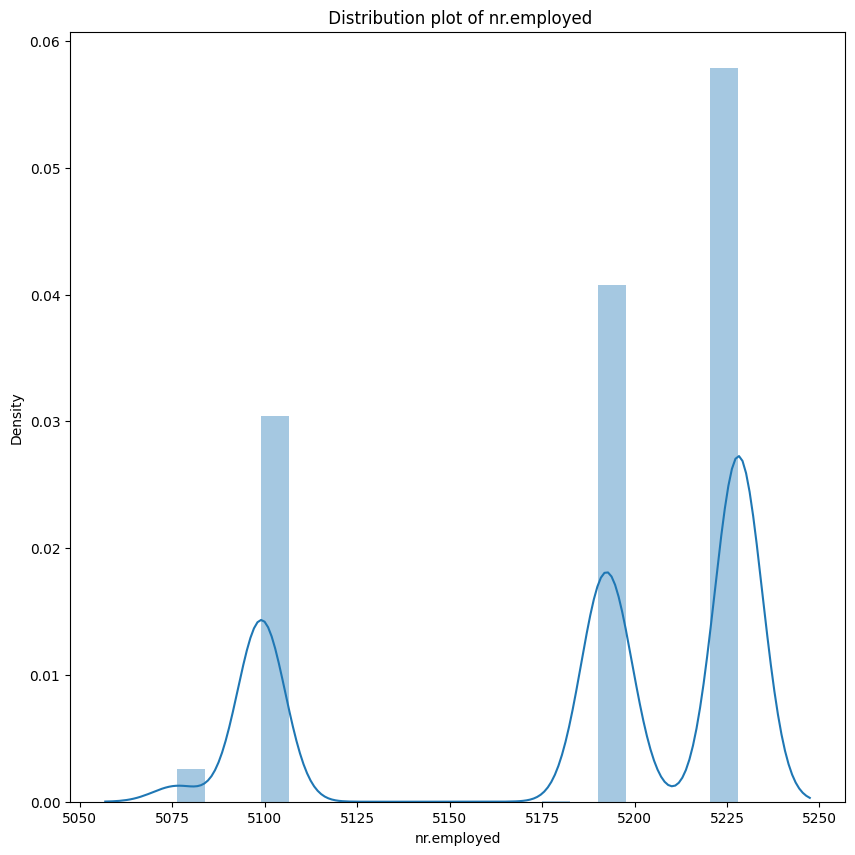

In [381]:
for column in numerical_values.columns:
    plt.figure(figsize=(10,10))
    sns.distplot(numerical_values[column])
    plt.title(f' Distribution plot of {column}')
    plt.show()


The data is heteregenous data

In [382]:
categorical_variables= data.select_dtypes(include='object')

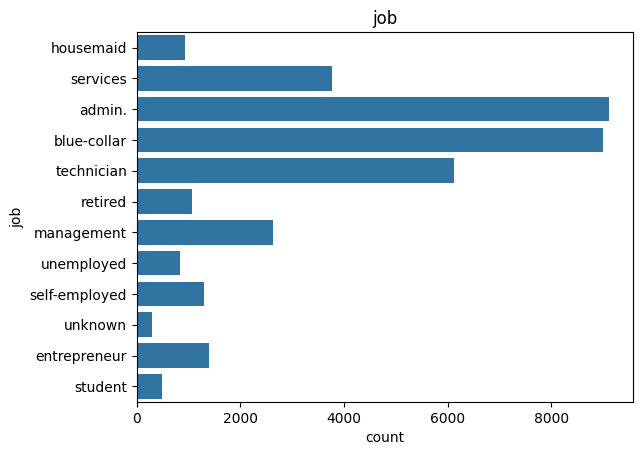

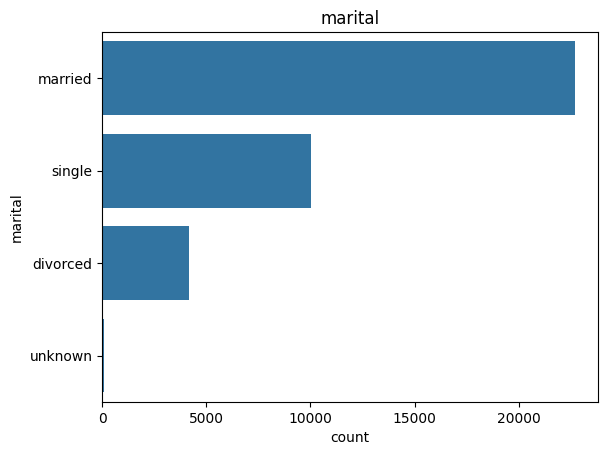

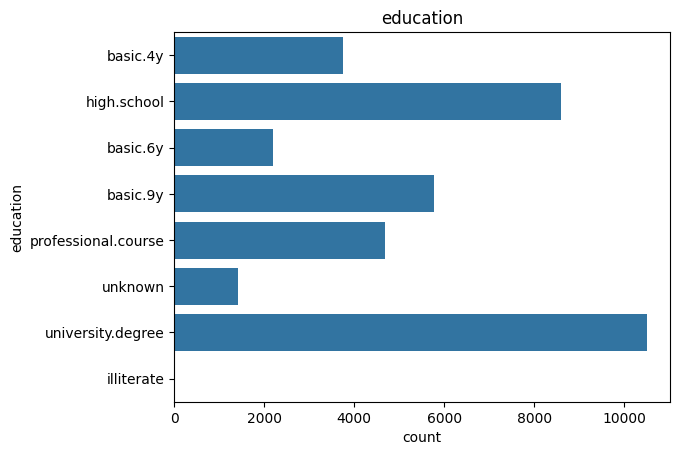

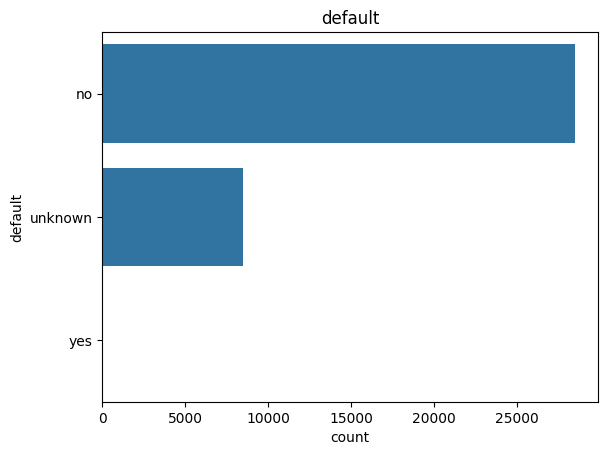

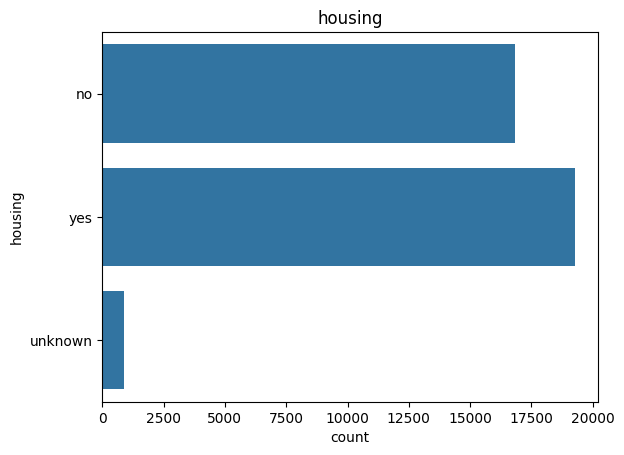

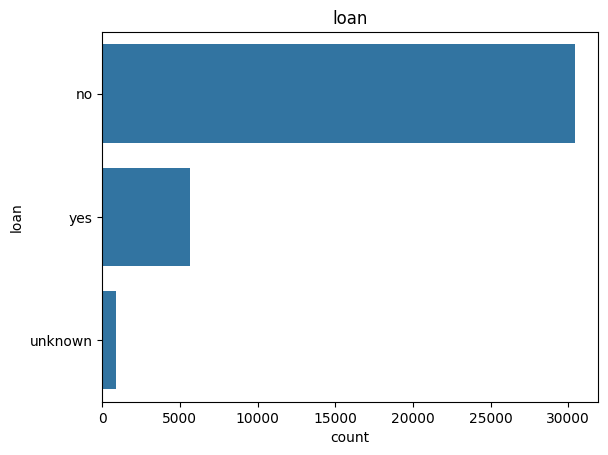

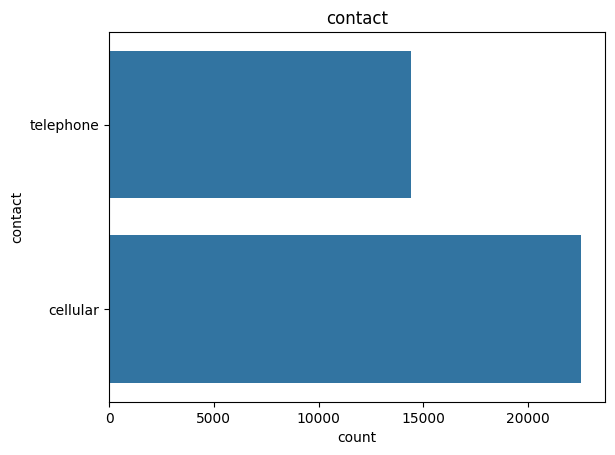

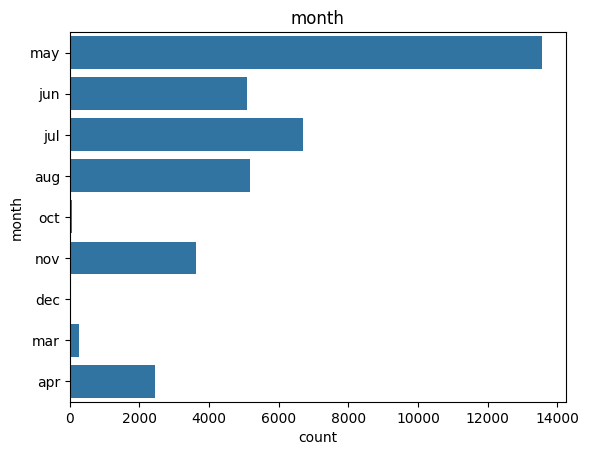

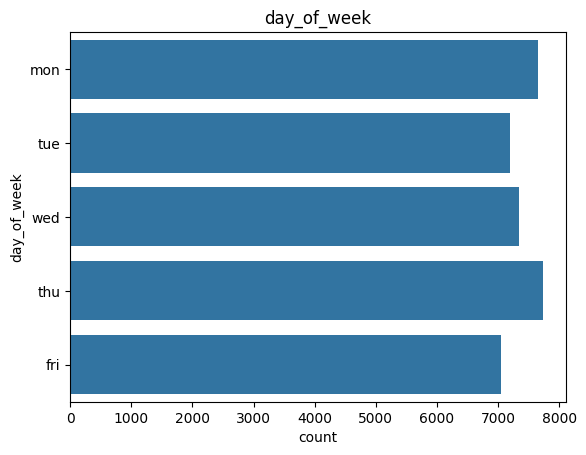

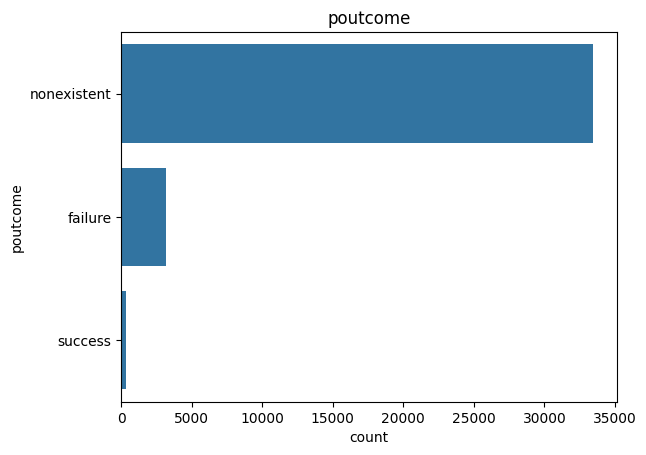

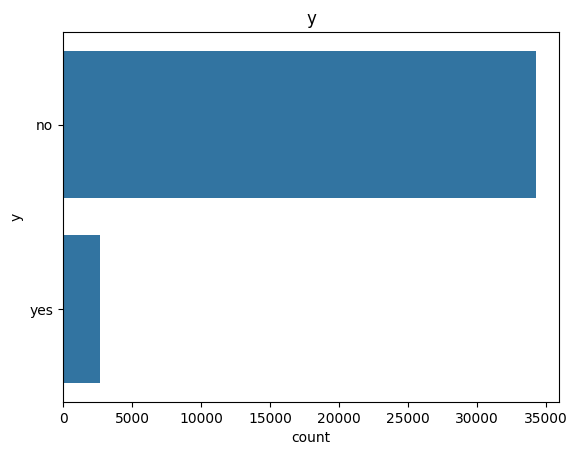

In [383]:
for column in categorical_variables:
    sns.countplot(categorical_variables[column])
    plt.title(f'{column}')
    plt.show()

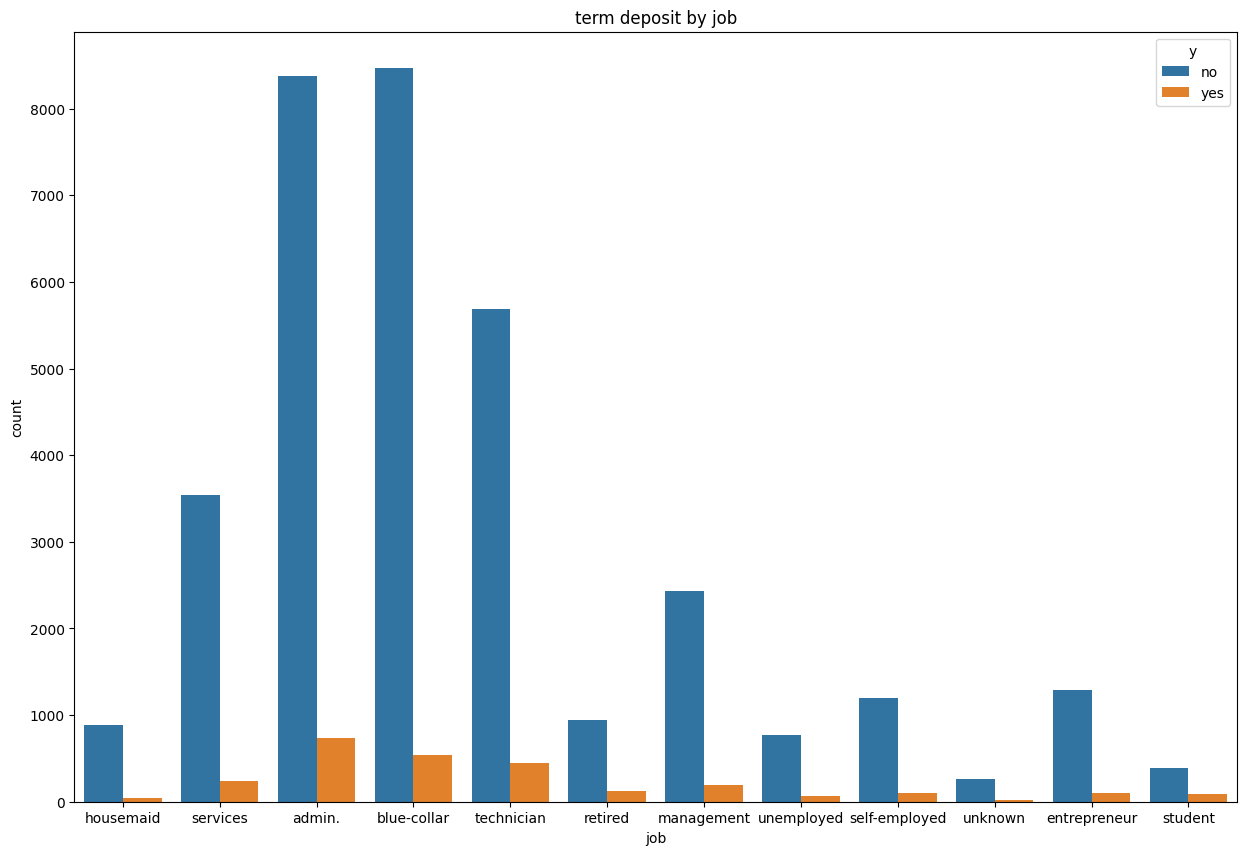

In [384]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'job', hue = 'y', data = data)
plt.title('term deposit by job')
plt.show()

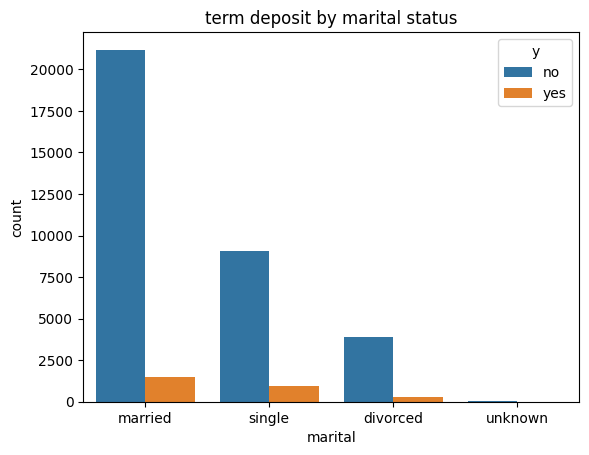

In [385]:
sns.countplot(x = 'marital', hue = 'y', data = data)
plt.title('term deposit by marital status')
plt.show()

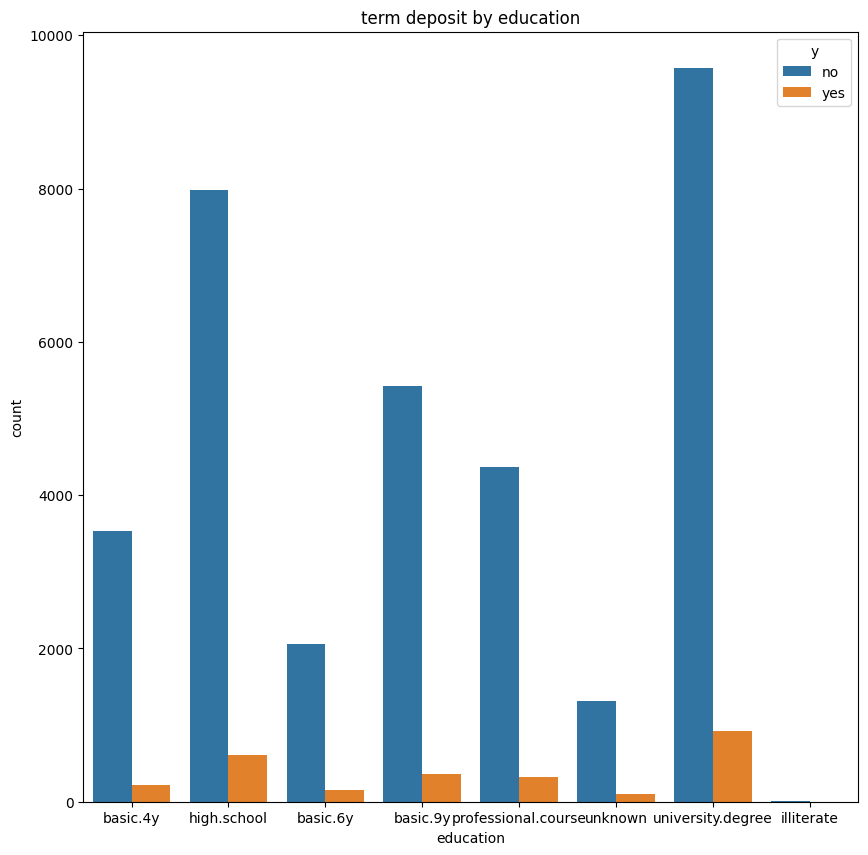

In [386]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'education', hue = 'y', data = data)
plt.title('term deposit by education')
plt.show()

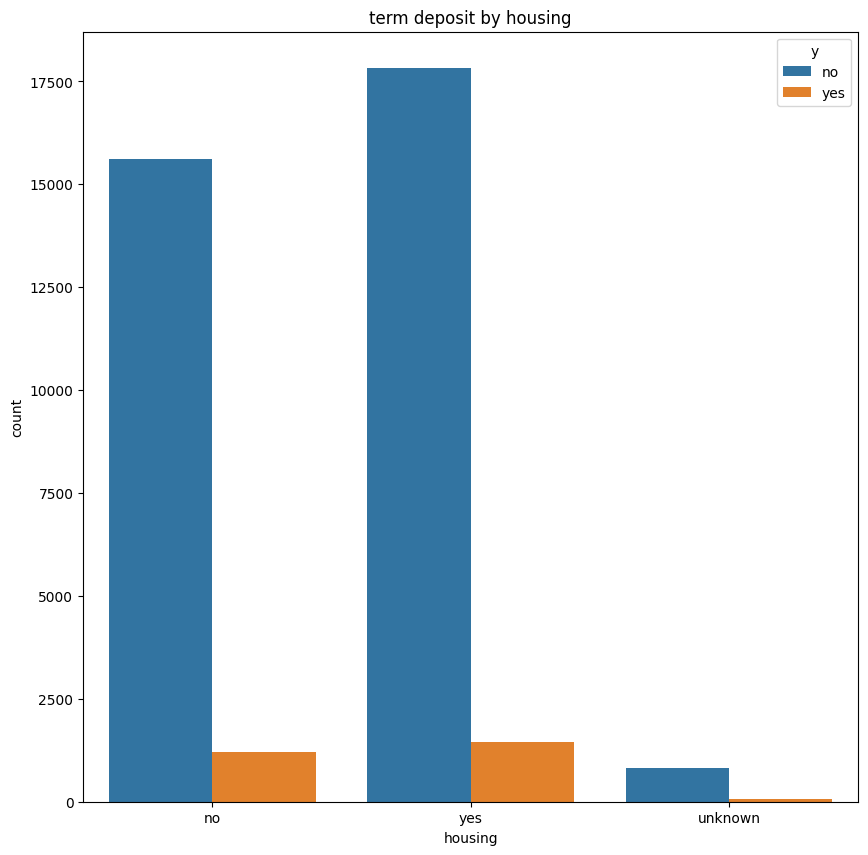

In [387]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'housing', hue = 'y', data = data)

plt.title('term deposit by housing')
plt.show()

qn 1
* The relationship between target_variable y (term deposit) and the categorical_variables is strong
* According the countplot the people in the jobs like admin and technician other some techincal fiels have their term deposit
* married customer have term deposit more than divorced or unmrried customers
* customer with univerity degreee have more term deposit compared to people with low level education
* Customer with house loan have more  term deposit than the people do not have the house loan


# Analysis

<Axes: >

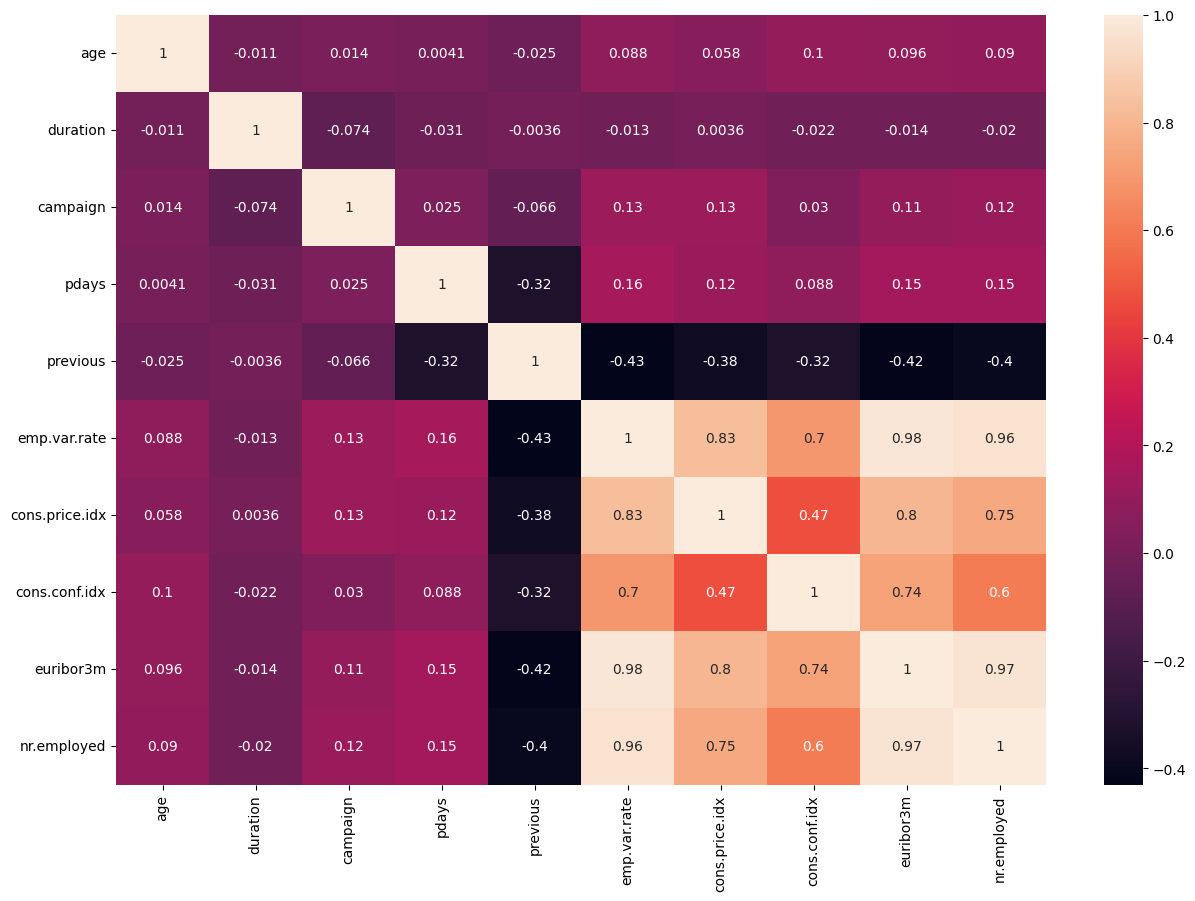

In [388]:

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)


In [389]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36959 entries, 0 to 36958
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             36959 non-null  int64  
 1   job             36959 non-null  object 
 2   marital         36959 non-null  object 
 3   education       36959 non-null  object 
 4   default         36959 non-null  object 
 5   housing         36959 non-null  object 
 6   loan            36959 non-null  object 
 7   contact         36959 non-null  object 
 8   month           36959 non-null  object 
 9   day_of_week     36959 non-null  object 
 10  duration        36959 non-null  int64  
 11  campaign        36959 non-null  int64  
 12  pdays           36959 non-null  int64  
 13  previous        36959 non-null  int64  
 14  poutcome        36959 non-null  object 
 15  emp.var.rate    36959 non-null  float64
 16  cons.price.idx  36959 non-null  float64
 17  cons.conf.idx   36959 non-null 

In [390]:
def chi2(var1,var2):
    contingency_table= pd.crosstab(var1,var2)
    _,p,_,_=chi2_contingency(contingency_table)
    if p>0.05:
        print('Accept null hypothesis')
    else:
      print('Reject alternative hypothesis')
      return contingency_table


In [391]:


for column in categorical_variables:
    chi2(data['y'],data[column])


Reject alternative hypothesis
Reject alternative hypothesis
Reject alternative hypothesis
Reject alternative hypothesis
Accept null hypothesis
Accept null hypothesis
Reject alternative hypothesis
Reject alternative hypothesis
Reject alternative hypothesis
Reject alternative hypothesis
Reject alternative hypothesis


# Encoding

In [392]:
for i in categorical_variables:
    print(categorical_variables[i].value_counts())

admin.           9116
blue-collar      9001
technician       6131
services         3777
management       2634
entrepreneur     1386
self-employed    1294
retired          1073
housemaid         939
unemployed        834
student           487
unknown           287
Name: job, dtype: int64
married     22687
single      10013
divorced     4187
unknown        72
Name: marital, dtype: int64
university.degree      10495
high.school             8591
basic.9y                5784
professional.course     4695
basic.4y                3752
basic.6y                2203
unknown                 1424
illiterate                15
Name: education, dtype: int64
no         28459
unknown     8497
yes            3
Name: default, dtype: int64
yes        19263
no         16813
unknown      883
Name: housing, dtype: int64
no         30419
yes         5657
unknown      883
Name: loan, dtype: int64
cellular     22549
telephone    14410
Name: contact, dtype: int64
may    13557
jul     6705
aug     5175
jun     508

In [393]:
exclude_columns = ['job','month','day_of_week']
le = LabelEncoder()

for i in data.columns:
    if data[i].dtype=='object'and  i not in exclude_columns:
        data[i] = le.fit_transform(data[i])
    else:
        if data[i].dtype=='object':
            data = pd.concat([data, pd.get_dummies(data[i], prefix=i)], axis=1)
            data = data.drop(i,axis=1)


# Model building

In [394]:
def model_eval(actual,predicted):
     conf_matrix=confusion_matrix(actual,predicted)
     acc_score= accuracy_score(actual,predicted)
     clas_rep=classification_report(actual,predicted)
     print(conf_matrix)
     print(' the accuracy  is:',acc_score)
     print(clas_rep)

In [395]:
y = data['y']
x = data.drop('y',axis=1)

In [396]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [397]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(29567, 43)
(7392, 43)
(29567,)
(7392,)


In [398]:
log_reg= LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [399]:
y_hat_train_log_reg= log_reg.predict(x_train)

In [400]:
y_hat_test_log_reg= log_reg.predict(x_test)

In [401]:
model_eval(y_train,y_hat_train_log_reg)

[[27008   386]
 [ 1619   554]]
 the accuracy  is: 0.9321879121994116
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     27394
           1       0.59      0.25      0.36      2173

    accuracy                           0.93     29567
   macro avg       0.77      0.62      0.66     29567
weighted avg       0.92      0.93      0.92     29567



In [402]:
model_eval(y_test,y_hat_test_log_reg)

[[6755  103    0]
 [ 368  165    0]
 [   0    1    0]]
 the accuracy  is: 0.9361471861471862
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      6858
           1       0.61      0.31      0.41       533
           2       0.00      0.00      0.00         1

    accuracy                           0.94      7392
   macro avg       0.52      0.43      0.46      7392
weighted avg       0.92      0.94      0.93      7392



# Decision Tree Classiifer

In [403]:
dtree=DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)

In [404]:
y_hat_train_dtree=dtree.predict(x_train)
y_hat_test_dtree= dtree.predict(x_test)

In [405]:
model_eval(y_train,y_hat_train_dtree)

[[26950   444]
 [ 1345   828]]
 the accuracy  is: 0.9394933540771806
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     27394
           1       0.65      0.38      0.48      2173

    accuracy                           0.94     29567
   macro avg       0.80      0.68      0.72     29567
weighted avg       0.93      0.94      0.93     29567



In [406]:
model_eval(y_test,y_hat_test_dtree)

[[6714  144    0]
 [ 305  228    0]
 [   0    1    0]]
 the accuracy  is: 0.9391233766233766
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6858
           1       0.61      0.43      0.50       533
           2       0.00      0.00      0.00         1

    accuracy                           0.94      7392
   macro avg       0.52      0.47      0.49      7392
weighted avg       0.93      0.94      0.93      7392



# Random Forest Classifier

In [407]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_leaf=20)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=20, n_estimators=1000)

# Important Features

In [408]:
feature_scores = pd.Series(rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores.head()


duration          0.616273
euribor3m         0.065849
cons.price.idx    0.035887
nr.employed       0.034433
emp.var.rate      0.034043
dtype: float64

In [409]:
y_hat_train_rf= rf.predict(x_train)
y_hat_test_rf= rf.predict(x_test)


In [410]:
model_eval(y_train,y_hat_train_rf)

[[27371    23]
 [ 2015   158]]
 the accuracy  is: 0.9310718030236412
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     27394
           1       0.87      0.07      0.13      2173

    accuracy                           0.93     29567
   macro avg       0.90      0.54      0.55     29567
weighted avg       0.93      0.93      0.90     29567



In [411]:
model_eval(y_test,y_hat_test_rf)

[[6847   11    0]
 [ 506   27    0]
 [   0    1    0]]
 the accuracy  is: 0.9299242424242424
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      6858
           1       0.69      0.05      0.09       533
           2       0.00      0.00      0.00         1

    accuracy                           0.93      7392
   macro avg       0.54      0.35      0.35      7392
weighted avg       0.91      0.93      0.90      7392



# XGBoost

#

In [412]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [413]:
y_hat_train_xgb = xgb.predict(x_train)
y_hat_test_xgb = xgb.predict(x_test)

In [414]:
model_eval(y_train, y_hat_train_xgb)

[[27221   173]
 [  642  1531]]
 the accuracy  is: 0.9724354855074915
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     27394
           1       0.90      0.70      0.79      2173

    accuracy                           0.97     29567
   macro avg       0.94      0.85      0.89     29567
weighted avg       0.97      0.97      0.97     29567



In [415]:
model_eval(y_test, y_hat_test_xgb)

[[6680  178    0]
 [ 254  279    0]
 [   0    1    0]]
 the accuracy  is: 0.9414231601731602
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6858
           1       0.61      0.52      0.56       533
           2       0.00      0.00      0.00         1

    accuracy                           0.94      7392
   macro avg       0.52      0.50      0.51      7392
weighted avg       0.94      0.94      0.94      7392



# Ada boost classifier

In [416]:
ada = AdaBoostClassifier(n_estimators=50)
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [417]:
y_hat_train_ada= ada.predict(x_train)
y_hat_test_ada= ada.predict(x_test)

In [418]:
model_eval(y_train,y_hat_train_ada)

[[26889   505]
 [ 1467   706]]
 the accuracy  is: 0.9333040213751818
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     27394
           1       0.58      0.32      0.42      2173

    accuracy                           0.93     29567
   macro avg       0.77      0.65      0.69     29567
weighted avg       0.92      0.93      0.92     29567



In [419]:
model_eval(y_test,y_hat_test_ada)

[[6729  129    0]
 [ 345  188    0]
 [   0    1    0]]
 the accuracy  is: 0.935741341991342
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      6858
           1       0.59      0.35      0.44       533
           2       0.00      0.00      0.00         1

    accuracy                           0.94      7392
   macro avg       0.51      0.44      0.47      7392
weighted avg       0.93      0.94      0.93      7392



# Gradient Boost Classifier

In [420]:
gb=GradientBoostingClassifier(n_estimators=100,min_samples_split=2)
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [421]:
y_hat_train_gb= gb.predict(x_train)
y_hat_test_gb= gb.predict(x_test)

In [422]:
model_eval(y_train,y_hat_train_gb)

[[26900   494]
 [ 1196   977]]
 the accuracy  is: 0.9428416816044914
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     27394
           1       0.66      0.45      0.54      2173

    accuracy                           0.94     29567
   macro avg       0.81      0.72      0.75     29567
weighted avg       0.94      0.94      0.94     29567



In [423]:
model_eval(y_test,y_hat_test_gb)

[[6704  154    0]
 [ 273  260    0]
 [   0    1    0]]
 the accuracy  is: 0.9420995670995671
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6858
           1       0.63      0.49      0.55       533
           2       0.00      0.00      0.00         1

    accuracy                           0.94      7392
   macro avg       0.53      0.49      0.51      7392
weighted avg       0.94      0.94      0.94      7392



# Conclusions

1.  The Random Forest classifier performed the best among all the models, with an accuracy of 92 percentage accuracy on the test set.
2.  The most important features for predicting term deposit were:
    * age
    * balance
    * housing
    * loan
    * marital
    * education